# My SSGA

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

import EntropyRateSuperpixel as ERS
import MyDataset as Data
import LambdaCoeff as LC
import ERSBasedSegmentation as SPS
import SNIC

import SSGA

### SNIC

In [2]:
usedDataset = Data.IndianPines
N,M,B = usedDataset["shape"]

In [5]:
K = 200
pca_data = SPS.compute_false_greyscale_img(usedDataset["data"])
SPs1 = SNIC.snic_segmentation(pca_data, K, compactness=0.001, shape="square")
SPs2 = SNIC.snic_segmentation(pca_data, K, compactness=0.001, shape="hexagon")

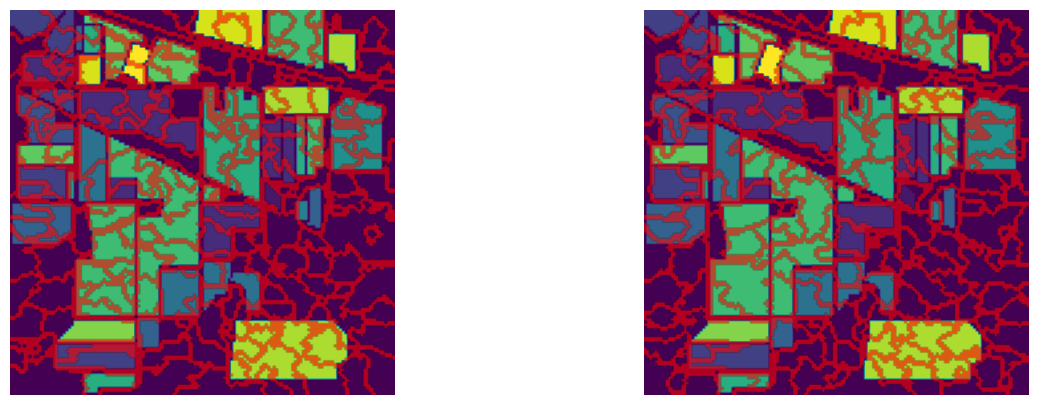

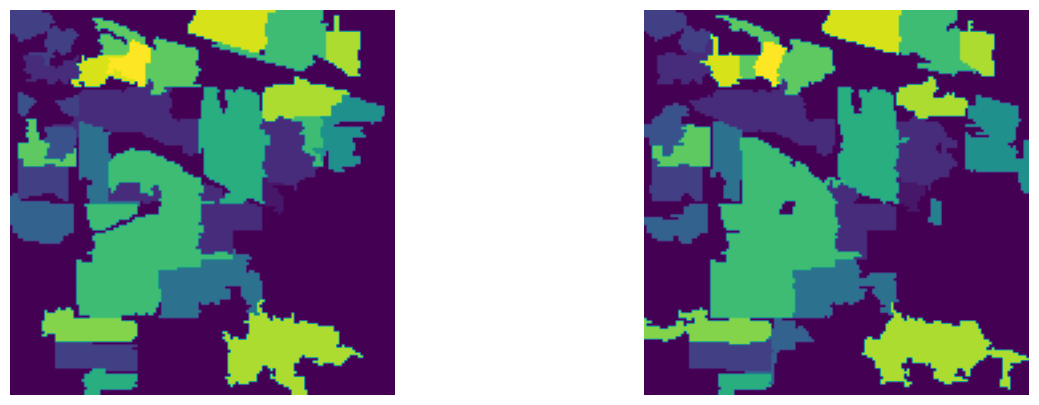

In [7]:
SPsList = [SPs1, SPs2]

fig, axs = plt.subplots(1, 2, figsize=(15,5))
for i,SPs in enumerate(SPsList):
    axs[i].imshow(usedDataset["gt"])
    axs[i].imshow(ERS.create_overlay_borders(usedDataset["gt"], SPs))
    axs[i].axis("off")
plt.show()

fig, axs = plt.subplots(1, 2, figsize=(15,5))
for i,SPs in enumerate(SPsList):
    axs[i].imshow(usedDataset["gt"])
    axs[i].imshow(ERS.SuperpixelClassifier(SPs, usedDataset["labels"], usedDataset["gt"]).guess_map)
    axs[i].axis("off")
plt.show()

### Import dataset

145 145 200


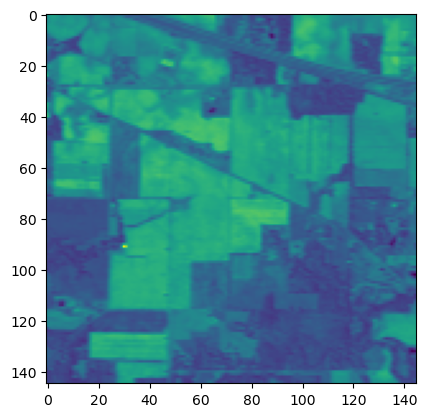

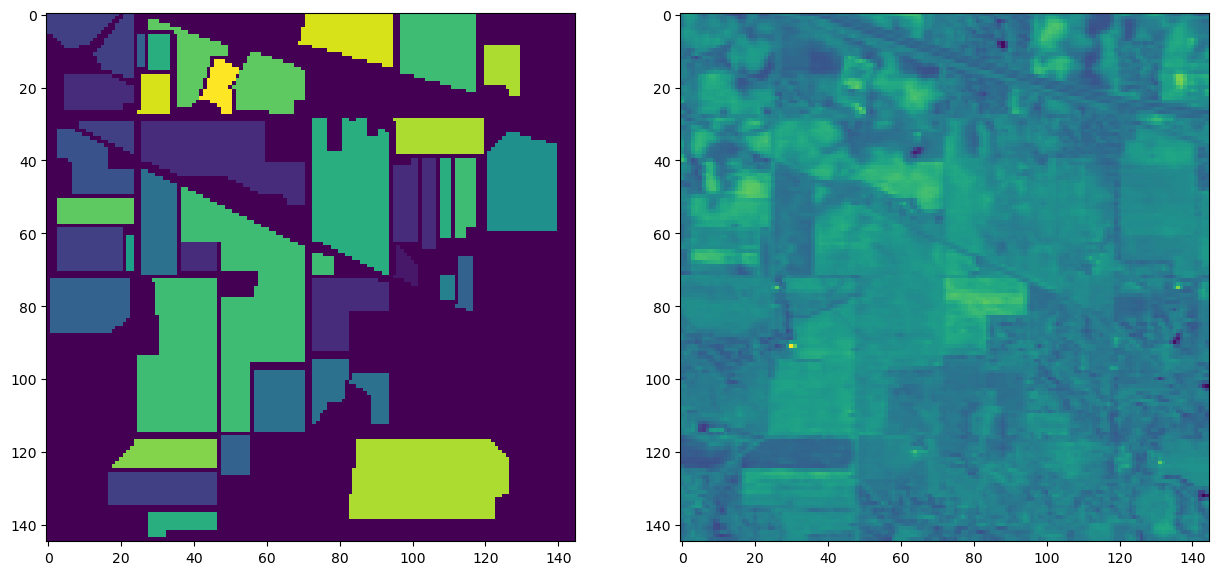

In [2]:

usedDataset = Data.IndianPines
#usedDataset = Data.SalinasScene
#usedDataset = Data.PaviaUniversity
#usedDataset = Data.PaviaCenter


N,M,B = usedDataset["shape"]
print(N,M,B)
trainData = Data.standardize_data(usedDataset["data"])


b = np.random.randint(0, B-1)
plt.imshow(usedDataset["data"][:,:,b])
plt.show()
fig, axs = plt.subplots(1, 2, figsize=(15,10))
axs[0].imshow(usedDataset["gt"])
axs[1].imshow(np.average(usedDataset["data"], axis=2))
plt.show()

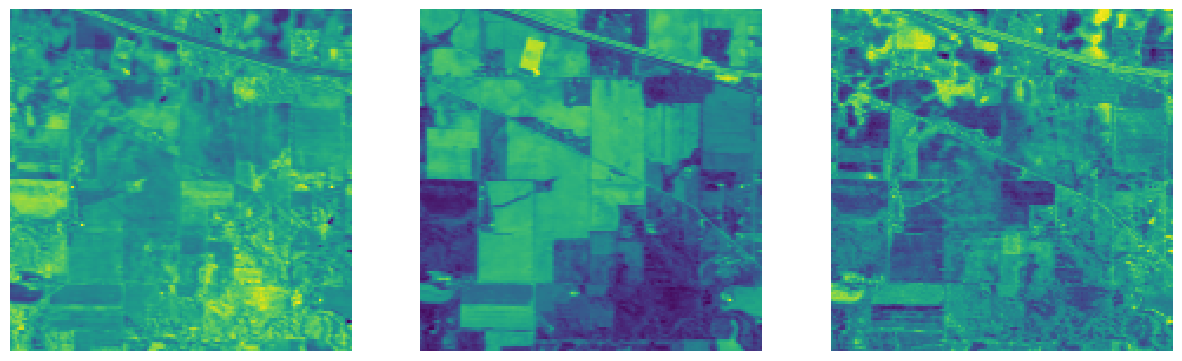

In [3]:
pca_data = SPS.compute_false_greyscale_img(usedDataset["data"])
fig, axs=  plt.subplots(1,3, figsize=(15,10))
for i in range(3):
    axs[i].imshow(pca_data[:,:,i], cmap="viridis", interpolation="none")
    axs[i].axis("off")
plt.show()

#plt.imshow(np.average(pca_data, axis=2), cmap="viridis", interpolation="none")
#plt.show()

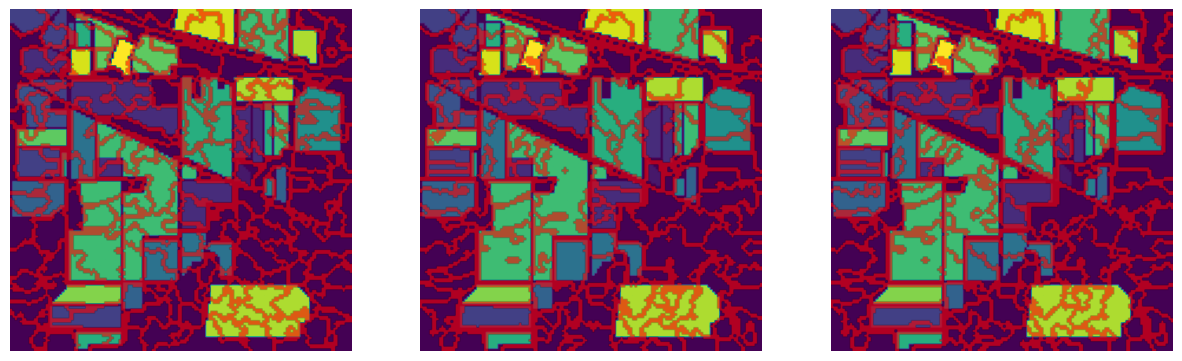

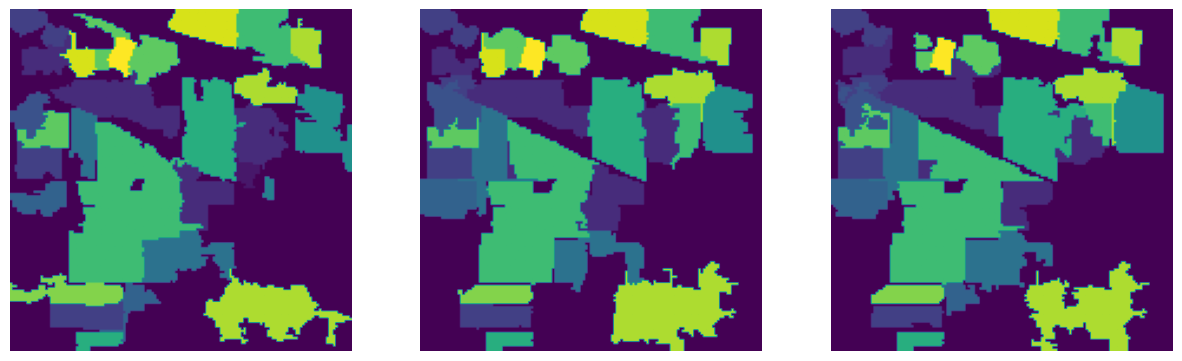

In [11]:
K = 200
SPs1 = SNIC.SNIC(pca_data, K, compactness=0.001, shape="hexagon")
SPs2 = SNIC.mySNIC(Data.normalized_data(usedDataset["data"]), K, compactness=0.000, shape="hexagon")
SPs3 = SNIC.mySNIC(Data.standardize_data(usedDataset["data"]), K, compactness=0.0000, shape="hexagon")

SPsList = [SPs1, SPs2, SPs3]

fig, axs = plt.subplots(1, 3, figsize=(15,5))
for i,SPs in enumerate(SPsList):
    axs[i].imshow(usedDataset["gt"])
    axs[i].imshow(ERS.create_overlay_borders(usedDataset["gt"], SPs))
    axs[i].axis("off")
plt.show()

fig, axs = plt.subplots(1, 3, figsize=(15,5))
for i,SPs in enumerate(SPsList):
    axs[i].imshow(usedDataset["gt"])
    axs[i].imshow(ERS.SuperpixelClassifier(SPs, usedDataset["labels"], usedDataset["gt"]).guess_map)
    axs[i].axis("off")
plt.show()

In [73]:
K = 1500
#data = plt.imread("images/low_flower.png")[:,:,:3]
data = pca_data

In [77]:
SPsSLIC = SNIC.SLIC(data, K, compactness=1.5)

In [75]:
SPsSNIC = SNIC.snic_segmentation(data, K, compactness=0.0001)

In [52]:
SPsERS = ERS.find_superpixel(Data.standardize_data(data), K, lambda_coef=20, simFun="average")

In [79]:
Ps = LC.computePs(K,N,M)
SPsERS, coef = LC.dichotomies_search(pca_data, K, 230, 250,
                                  similarity_function="average", Ps=Ps, print_info=True)

finding lambda coeff: 240
finding lambda coeff: 245
finding lambda coeff: 242
finding lambda coeff: 243
finding lambda coeff: 242


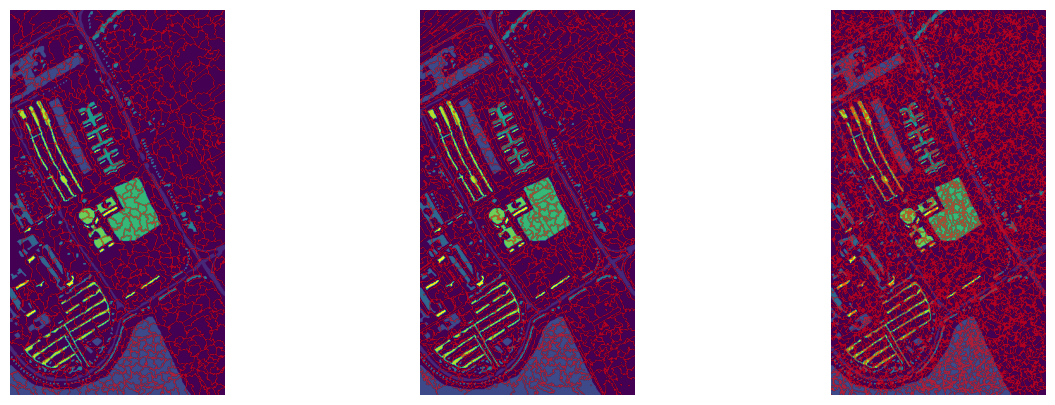

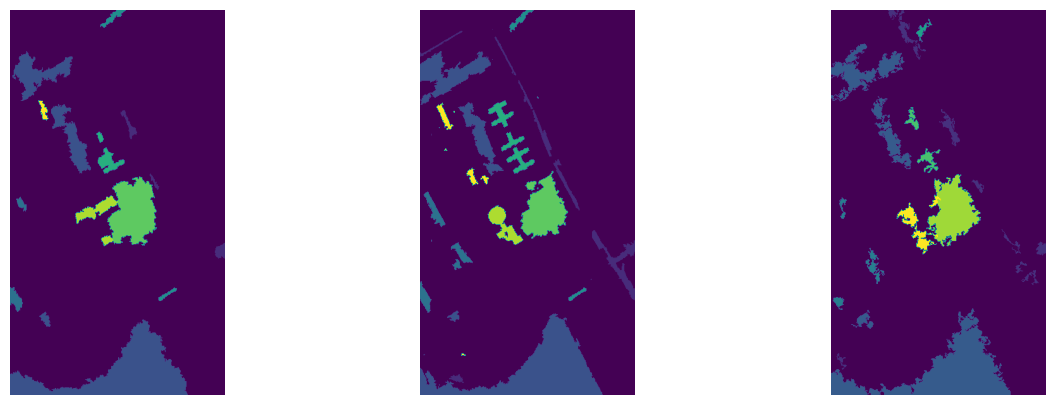

In [78]:
SPsList = [SPsSLIC, SPsSNIC, SPsERS]

fig, axs = plt.subplots(1, 3, figsize=(15,5))
for i,SPs in enumerate(SPsList):
    axs[i].imshow(usedDataset["gt"])
    axs[i].imshow(ERS.create_overlay_borders(usedDataset["gt"], SPs))
    axs[i].axis("off")
plt.show()

fig, axs = plt.subplots(1, 3, figsize=(15,5))
for i,SPs in enumerate(SPsList):
    axs[i].imshow(usedDataset["gt"])
    axs[i].imshow(ERS.SuperpixelClassifier(SPs, usedDataset["labels"], usedDataset["gt"]).guess_map)
    axs[i].axis("off")
plt.show()

finding lambda coeff: 32
finding lambda coeff: 23
finding lambda coeff: 27
finding lambda coeff: 29
finding lambda coeff: 30


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


finding lambda coeff: 31
31


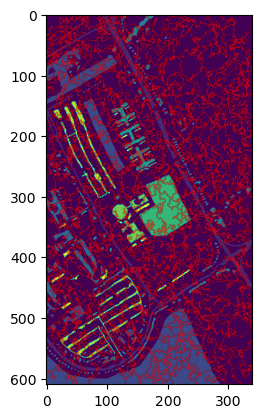

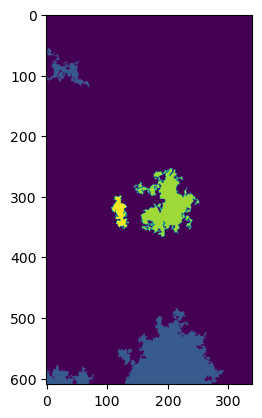

In [ ]:
#Ks = [100, 300, 500, 700, 900, 1100, 1300, 1500]
K = 300

data = pca_data

Ps = LC.computePs(K, N, M)
SPs, coeff = LC.dichotomies_search(data, K, 15, 50, 
                                   similarity_function="average",
                                   Ps=Ps, print_info=True)

print(coeff)
plt.imshow(data)
plt.imshow(usedDataset["gt"])
plt.imshow(ERS.create_overlay_borders(data, SPs))
plt.show()
plt.imshow(ERS.SuperpixelClassifier(SPs, usedDataset["labels"], usedDataset["gt"]).guess_map)

In [16]:
K = 100
data = pca_data

max_id = 0
max_oa = 0
max_SPs = []
l = np.arange(0.00, 0.002, 0.0001)
for i in l:
    SPs = SNIC.snic_segmentation(data, K, compactness=i)
    C = ERS.SuperpixelClassifier(SPs, usedDataset["labels"], usedDataset["gt"])
    oa = C.overallAccuracy(usedDataset["gt"])
    if oa>max_oa:
        max_oa = oa
        max_SPs = SPs
        max_id = i

print(max_id, max_oa)
plt.imshow(data)
plt.imshow(usedDataset["gt"])
plt.imshow(ERS.create_overlay_borders(data, max_SPs))
plt.show()

plt.imshow(ERS.SuperpixelClassifier(max_SPs, usedDataset["labels"], usedDataset["gt"]).guess_map)

KeyboardInterrupt: 

In [7]:
from sklearn.decomposition import PCA

class SPInfo:
    def __init__(self, pixels, data, n_component):
        self.time_series = np.array([data[x,y] for x,y in pixels])
        self.mean = np.average(self.time_series, axis=0)
        self.std = np.std(self.time_series, axis=0)
        self.neighboor = set()

        self.n_component = min(n_component, min(self.time_series.shape))

        self.pca = PCA(n_components=self.n_component)
        self.coeffs = self.pca.fit_transform(self.time_series)
        self.components = np.array([self.pca.components_[i]+self.pca.mean_ for i in range(self.n_component)])     

In [4]:
def CosineSim(x,y):
    return 1-(np.dot(x,y)/(np.linalg.norm(x)*np.linalg.norm(y)) +1)/2


def PerasonCorrelation(x,y):
    sx = (x-np.average(x))/np.std(x)
    sy = (x-np.average(y))/np.std(y)
    return CosineSim(sx,sy)


def sim_comp_perason(comp1, comp2):
    n,_ = comp1.shape
    m,_ = comp2.shape
    distances = np.zeros((n,m))
    for i in range(n):
        for j in range(m):
            distances[i,j] = PerasonCorrelation(comp1[i], comp2[j])
    return np.average(distances)


def comp_SP(info1:SPInfo, info2:SPInfo):
    compSim = sim_comp_perason(info1.components, info2.components)
    return compSim


def compute_medoid(group, simFun=PerasonCorrelation):
    n,_ = group.shape
    distances = np.zeros(n)
    for i in range(n):
        for j in range(n):
            if i!=j:
                distances[i] += simFun(group[i], group[j])
    metroid_index = np.argmin(distances)
    return group[metroid_index]

### Compute SPs

##### Choice of K

Want $K$ respecting two criteria:

First criteria:
$$\frac{N M}{K} \geq P_{avg} \Leftrightarrow K\leq \frac{NM}{P_{avg}}$$
with $P_{avg}$ a constant (=20).

Second Criteria:
$$P_s \geq \delta \Leftrightarrow f(\frac{NM}{K}) \geq \frac{\delta}{\gamma} \Leftrightarrow K \leq \frac{NM}{f^{-1}(\frac{\delta}{\gamma})}$$
with $\delta$ the number of component used in PCA, $f : x \mapsto x ln^2(x)$.

Therefore, the criteria on $K$ can be merge to get:
$$ K\leq \frac{NM}{max(P_{avg},\; f^{-1}(\frac{\delta}{\gamma}))}$$

49.05055563858078
428


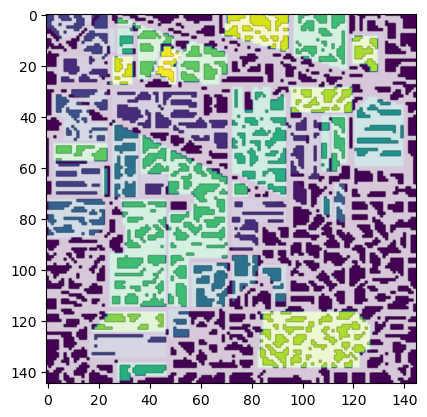

In [5]:
from scipy.optimize import root_scalar

def merge_SP(SPs_or, SPs_info_or, K, data, simFun=comp_SP):
    def insert_sorted(l, elt):
        _,_,w = elt
        left, right = 0, len(l)
        while left < right:
            mid = (left+right)//2
            if l[mid][2]<w:
                left = mid+1
            else:
                right = mid
        l.insert(left, elt)


    n_component = SPs_info_or[0].n_component
    SPs = [SP.copy() for SP in SPs_or]
    SPs_info = [SPInfo(SP, data, n_component) for SP in SPs]
    for i in range(len(SPs)):
        SPs_info[i].neighboor = SPs_info_or[i].neighboor.copy()

    nb_cc = len(SPs)
    existing = [True for _ in range(nb_cc)]
    edges = [(u, v, simFun(SPs_info[u], SPs_info[v])) for u in range(nb_cc)
                for v in SPs_info[u].neighboor if u<v]
    edges.sort(key=lambda x:x[2])
    
    while nb_cc > K and len(edges)>0:
        k1,k2,_ = edges.pop(0)
        if existing[k1] and existing[k2]:
            existing[k2] = False
            SPs[k1] += SPs[k2]
            neighboors = SPs_info[k1].neighboor.union(SPs_info[k2].neighboor)
            SPs_info[k1] = SPInfo(SPs[k1], data, n_component)
            SPs_info[k1].neighboor = neighboors

            edges = [(u,v,w) for u,v,w in edges if u!=k1 and v!=k2 and u!=k2 and v!=k1 and existing[u] and existing[v]]
            for v in SPs_info[k1].neighboor:
                if v!=k1 and v!=k2 and existing[v]:
                    insert_sorted(edges, (k1,v,simFun(SPs_info[k1], SPs_info[v])))
            
            nb_cc -=1

    return [SP for i,SP in enumerate(SPs) if existing[i]], [SP_info for i,SP_info in enumerate(SPs_info) if existing[i]]



def compute_SP_by_merging(K):

    # Computing K_or
    def f(x):
        return x * np.log(np.log(x))

    def f_inverse(y, x0=5.0):
        if y <= 0:
            raise ValueError("f(x) = x log(log(x)) is only defined for x > e")
        
        def equation(x):
            return f(x) - y
        
        result = root_scalar(equation, bracket=[np.e + 1e-5, 1e10], method='brentq')
        return result.root

    P_avg = 20
    gamma = 0.15
    n_component = 10
    choosen_max = max(P_avg, f_inverse(n_component/gamma))
    print(choosen_max)
    K_or = int(N*M/choosen_max)
    print(K_or)


    # Computing K_or SP using ERS
    SPs = ERS.find_superpixel(trainData, K_or, lambda_coef="auto", simFun="norm1")
    pixelToSP = np.zeros((N,M), dtype=int)
    for k,SP in enumerate(SPs):
        for x,y in SP:
            pixelToSP[x,y] = k
        
    plt.imshow(usedDataset["gt"])
    plt.imshow(ERS.create_overlay_borders(usedDataset["gt"], SPs, color=[255,255,255,200]))
    plt.show()  

    # Compute info
    n_component = 10
    SPs_info = [SPInfo(SP, trainData, n_component) for SP in SPs]
    borders = ERS.find_borders(SPs, (N,M), exterior=True)
    for k1 in range(len(borders)):
        for x,y in borders[k1]:
            k2 = pixelToSP[x,y]
            SPs_info[k1].neighboor.add(k2)

    return merge_SP(SPs, SPs_info, K, trainData)


K = 100
new_SPs, new_SPs_info = compute_SP_by_merging(K)

In [6]:
K = 100
SPs_or = ERS.find_superpixel(trainData, K,
                          lambda_coef="auto",
                          simFun="norm1",
                          diagonnalyConnected=True)

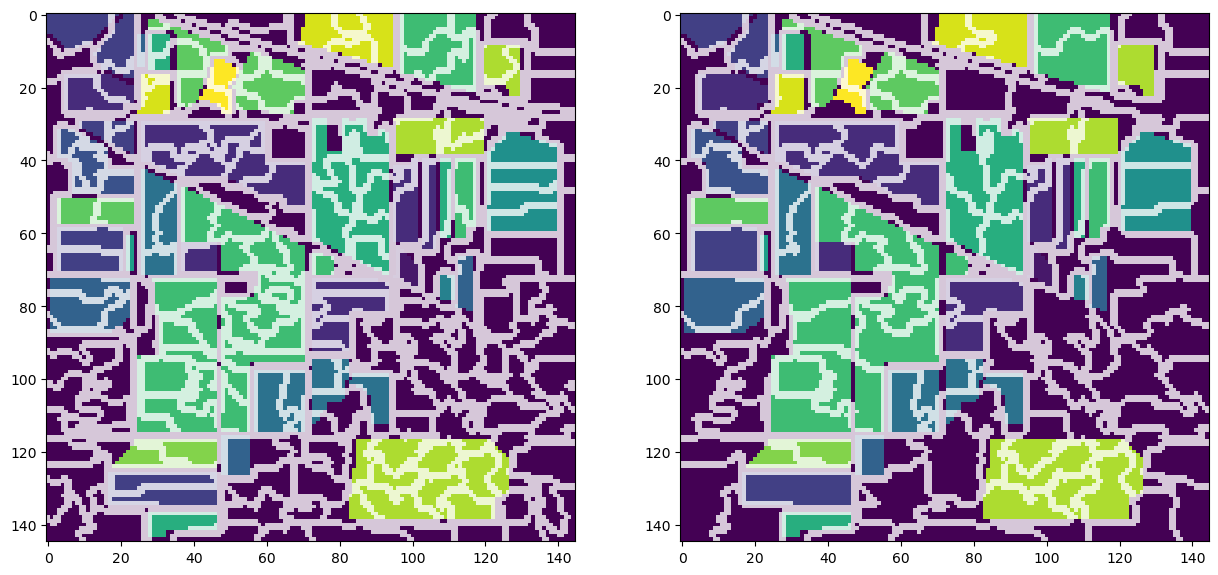

In [7]:

sizeMatter = 200
SPs_or2_or = ERS.find_superpixel(trainData, sizeMatter, lambda_coef=ERS.getLambdaNorm1(K,N,M),
                                 simFun="norm1", shutSizeMatter=200)
SPs_or2 = ERS.find_superpixel(trainData, K,
                          lambda_coef="auto",
                          simFun="norm1",
                          diagonnalyConnected=True,
                          shutSizeMatter=sizeMatter,
                          newLambdaValue=ERS.getLambdaNorm1(sizeMatter, N, M))

fig, axs = plt.subplots(1, 2, figsize=(15,10))
axs[0].imshow(usedDataset["gt"])
axs[0].imshow(ERS.create_overlay_borders(usedDataset["gt"], SPs_or2_or, color=[255,255,255,200]))
axs[1].imshow(usedDataset["gt"])
axs[1].imshow(ERS.create_overlay_borders(usedDataset["gt"], SPs_or2, color=[255,255,255,200]))
plt.show()

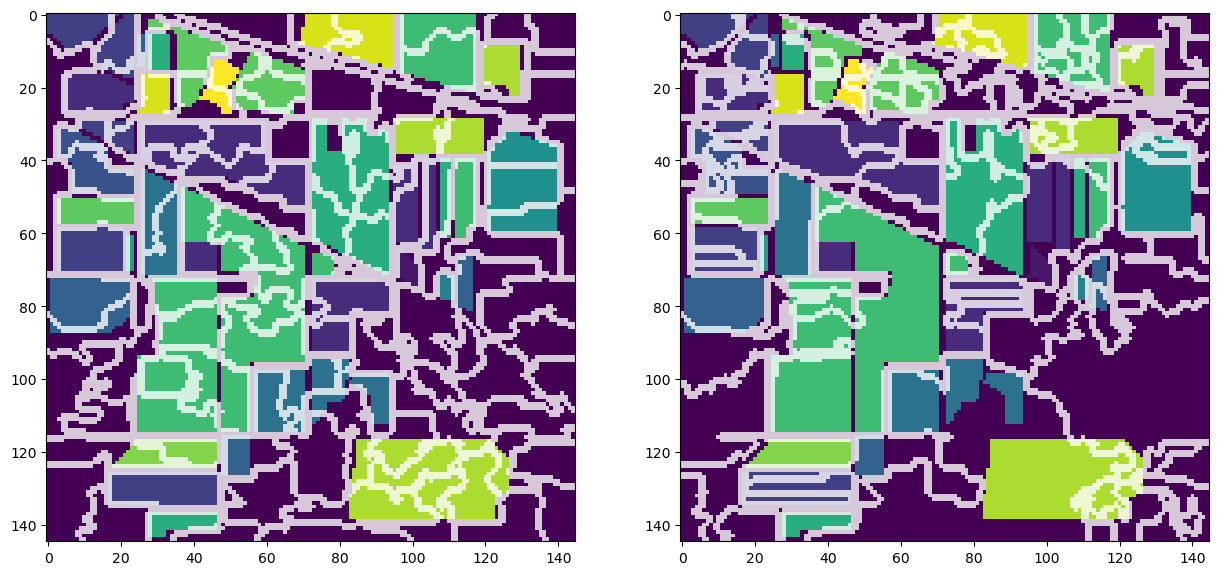

In [8]:
fig, axs = plt.subplots(1, 2, figsize=(15,10))
axs[0].imshow(usedDataset["gt"])
axs[0].imshow(ERS.create_overlay_borders(usedDataset["gt"], SPs_or, color=[255,255,255,200]))
axs[1].imshow(usedDataset["gt"])
axs[1].imshow(ERS.create_overlay_borders(usedDataset["gt"], new_SPs, color=[255,255,255,200]))
plt.show()

### Times series analysis

In [5]:
Ks = [50, 100, 200, 300, 400, 500, 600]
SPsDic = SPS.mergedBasedSegmentation(trainData, Ks, 
                                     n_component=0,
                                     usedVarFun=SPS.stdFtestnorm1,
                                     dist=(1,""))
Classifiers = {b: {K:
                    ERS.SuperpixelClassifier(SPsDic[K], usedDataset["labels"], usedDataset["gt"], counting0=b)
                    for K in Ks}
               for b in [True, False]}

In [18]:
SPs = [pixels for key,(name, pixels) in usedDataset["class"].items()]
K = len(SPs)

In [3]:
class Graph:
    def __init__(self, n):
        self.n = n
        self.edges = [set() for _ in range(n)]

    def add_edge(self, u, v):
        self.edges[u].add(v)
        self.edges[v].add(u)

    def composante_connexe(self):
        cc = [-1 for _ in range(self.n)]

        def parcour(cc_id, todo:list):
            while len(todo)!=0:
                u = todo.pop(0)
                if cc[u]==-1:
                    cc[u] = cc_id
                    todo = todo + list(self.edges[u])
                else:   
                    todo = todo

        cc_id = -1
        for i in range(self.n):
            if cc[i]==-1:
                cc_id += 1
                parcour(cc_id, [i])
        return cc

In [4]:
graph = Graph(N*M)
maxi = max(N,M)
for i in range(N):
    for j in range(M):
        u = i*maxi + j

        if i+1<N and usedDataset["gt"][i,j]==usedDataset["gt"][i+1,j]:
            graph.add_edge(u, (i+1)*maxi + j)
        if j+1<M and usedDataset["gt"][i,j]==usedDataset["gt"][i,j+1]:
            graph.add_edge(u, i*maxi + j+1)

cc = graph.composante_connexe()
K = max(cc)+1
SPs = [[] for _ in range(K)]
img = np.zeros((N,M), dtype=int)

for i in range(N):
    for j in range(M):
        u = i*maxi + j
        img[i,j] = cc[u]
        SPs[cc[u]].append((i,j))


#plt.imshow(img)

K = len(SPs)

In [ ]:
from classes import MinHeap


K = 100
heap = MinHeap()
nb_edges = N*M-K
for u in range(nb_edges):
    heap.insert(None, -10**9)

maxi = max(N,M)
for u in range(N*M):
    if(u%N==0):
        print(int(10000*u/(N*M))/100, end="% ")
    for v in range(u+1, N*M):
        u_i, u_j = u//maxi, u%maxi
        v_i, v_j = v//maxi, v%maxi
        w = ERS.norm2_similarity(usedDataset["data"][u_i,u_j], usedDataset["data"][v_i,v_j])

        max_dist = -heap.getMin()[1]
        if w<max_dist:
            heap.pop()
            heap.insert((u,v), -w)


graph = Graph(N*M)
for pair in heap.array:
    u,v = pair.first()
    graph.add_edge(u,v)

cc = graph.composante_connexe()
K = max(cc)+1
SPs = [[] for _ in range(K)]
img = np.zeros((N,M), dtype=int)

for i in range(N):
    for j in range(M):
        u = i*maxi + j
        img[i,j] = cc[u]
        SPs[cc[u]].append((i,j))


plt.imshow(img)

K = len(SPs)

0.0% 0.68% 1.37% 2.06% 2.75% 

KeyboardInterrupt: 

17


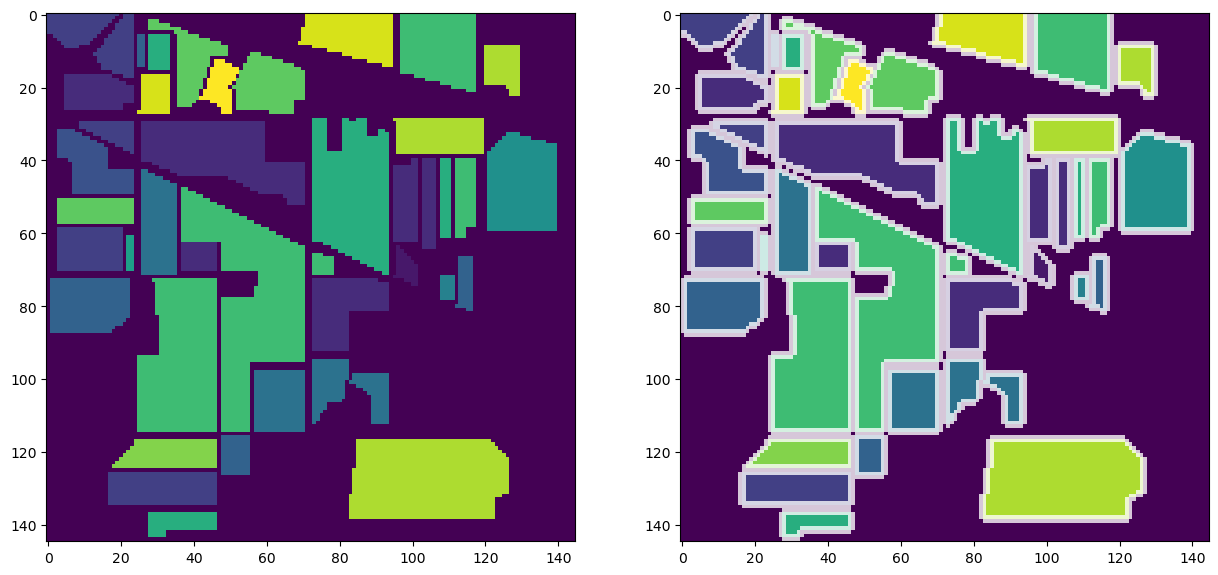

In [19]:
print(len(SPs))
fig, axs = plt.subplots(1, 2, figsize=(15,10))
axs[0].imshow(usedDataset["gt"])
axs[1].imshow(usedDataset["gt"])
axs[1].imshow(ERS.create_overlay_borders(usedDataset["gt"], SPs, color=[255,255,255,200]))
plt.show()

In [20]:
n_component = 4
SPs_info = [SPInfo(SP, trainData, n_component) for SP in SPs]

### Time series processing

In [21]:
Bs = np.arange(0, B)

def z_normalize(ts):
    ts = np.array(ts)
    return (ts - np.mean(ts)) / np.std(ts)

TS = []
TS_Z = []
for SP in SPs:
    TS.append(np.array([trainData[x,y] for x,y in SP]))
    TS_Z.append(np.array([z_normalize(trainData[x,y]) for x,y in SP]))


In [22]:
k1 = np.random.randint(0, K-1)
print(k1)
print(len(SPs[k1]))

6
730


In [23]:
k2 = np.random.randint(0, K-1)
print(k2)
print(len(SPs[k2]))

11
2455


In [24]:
k3 = np.random.randint(0, K-1)
print(k3)
print(len(SPs[k3]))

15
386


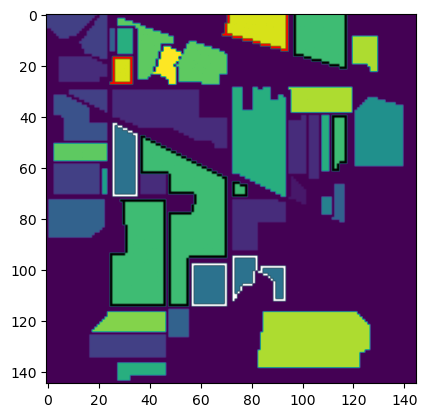

In [25]:
"""
K=50, IndainPines
k1 = 42
k2 = 44
k3 = 5

K=100 on IndianPines
k1 = 49
k2 = 63
k3 = 42

K=300 on IndianPines
k1 = 132
k2 = 219
k3 = 85

One SP per label:
k1 = 11
k2 = 10
k3 = 6

One SP per connected label:
k1 = 19
k2 = 27
k3 = 49
"""


plt.imshow(usedDataset["gt"])
plt.imshow(ERS.create_overlay_borders(usedDataset["gt"], [SPs[k1]], color=[255,255,255,255]))
plt.imshow(ERS.create_overlay_borders(usedDataset["gt"], [SPs[k2]], color=[0,0,0,255]))
plt.imshow(ERS.create_overlay_borders(usedDataset["gt"], [SPs[k3]], color=[255,0,0,255]))
plt.show()

0.36952410113240797
32.63341321063258


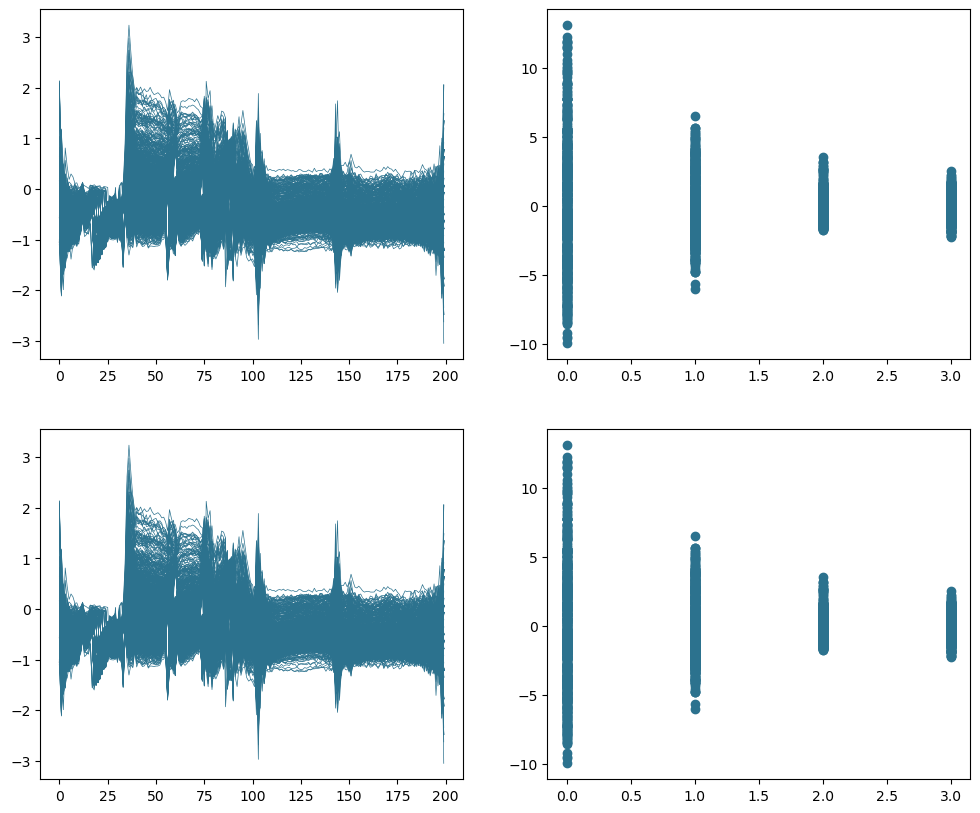

0.4991616379147578
55.92042052421907


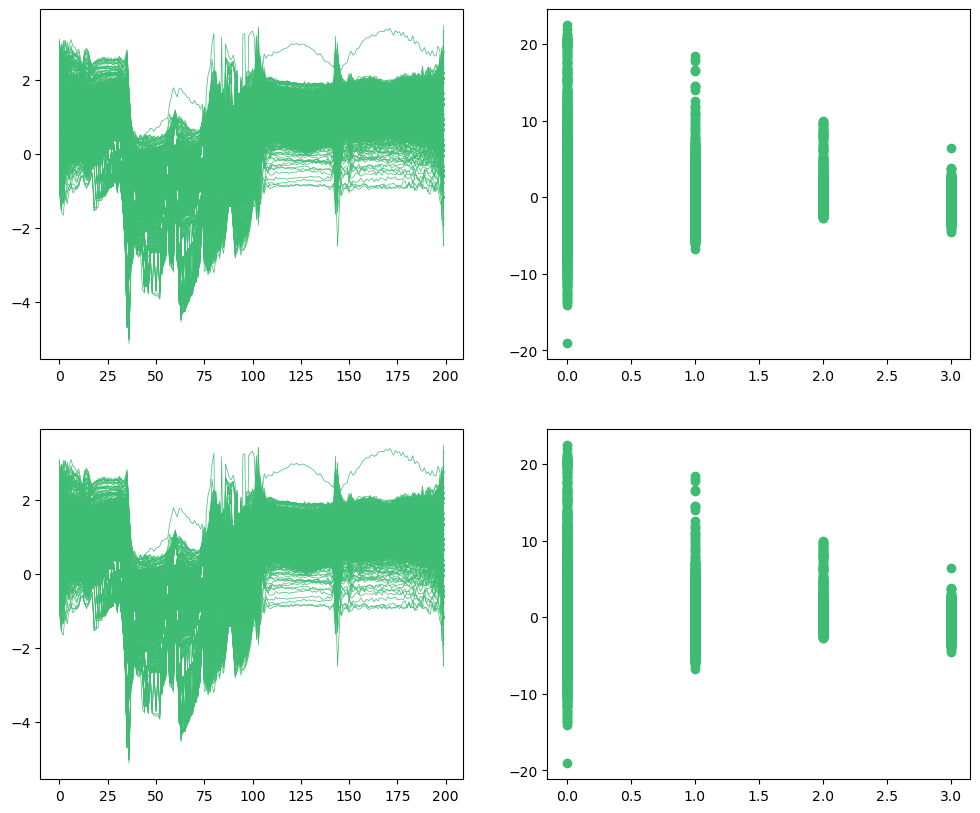

0.5516689035753556
72.35649383527674


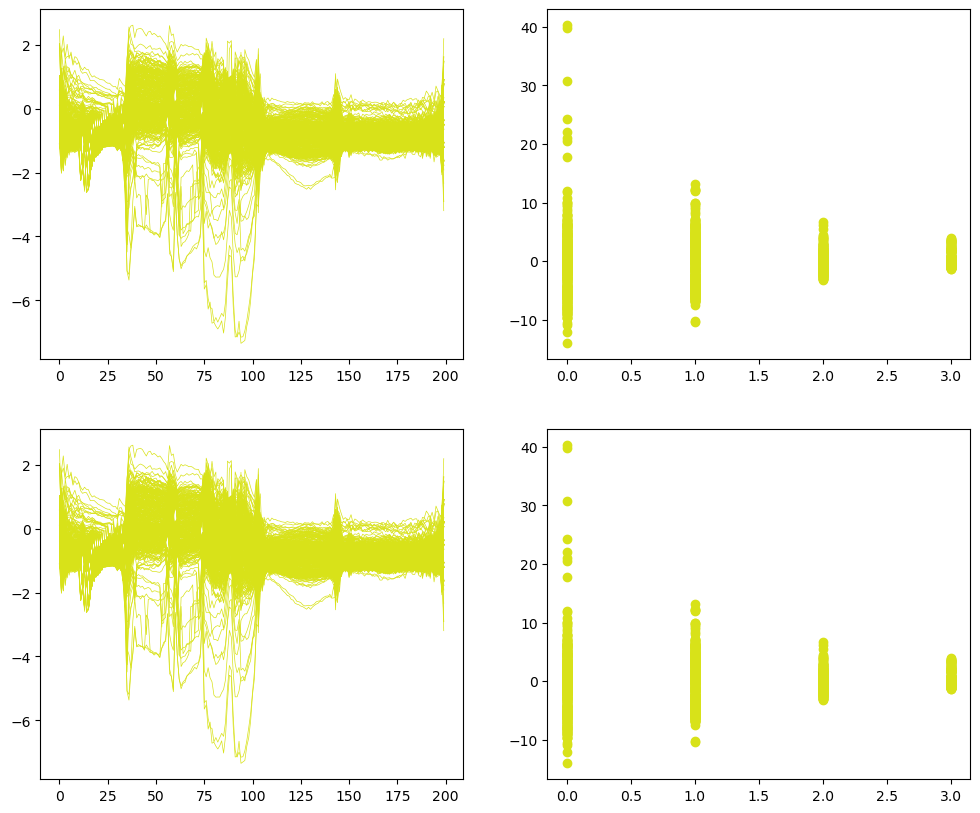

In [26]:
plot_in_space = True
cmap = mpl.colormaps["viridis"]
colors = cmap(np.linspace(0, 1, len(usedDataset["class"])))

for k in [k1, k2, k3]:
    info = SPs_info[k]
    SP = SPs[k]

    fig = plt.figure(figsize=(12, 10))
    gs = mpl.gridspec.GridSpec(2, 2,  figure=fig)
    projection = '3d' if plot_in_space and n_component==3 else None
    axs = [[fig.add_subplot(gs[0,0]), fig.add_subplot(gs[0,1], projection=projection)],
           [fig.add_subplot(gs[1,0]), fig.add_subplot(gs[1,1], projection=projection)]]

    
    for j in range(2):
        for i, (x,y) in enumerate(SP):
            if not(j==1 and usedDataset["gt"][x,y]==0):
                color="black" if usedDataset["gt"][x,y]==0 else colors[usedDataset["gt"][x,y]]
                
                axs[j][0].plot(np.arange(0, B), info.time_series[i], "-", color=color, linewidth=0.5)
                if n_component==2:
                    axs[j][1].plot(info.coeffs[i][0], info.coeffs[i][1], "o", color=color)
                elif n_component==3:
                    axs[j][1].plot(info.coeffs[i][0], info.coeffs[i][1], info.coeffs[i][2], "o", color=color)
                else:
                    axs[j][1].plot(np.arange(0, n_component), info.coeffs[i], "o", color=color, linewidth=0.5)

    print(np.mean(np.std(info.time_series, axis=0)))
    print(np.var(info.time_series, axis=0).sum())
    #medoid = compute_medoid(info.time_series) # medoid is bad
    #axs[0].plot(np.arange(0, B), medoid, "-", linewidth=0.5, color="red")

    plt.show()
    

In [12]:
def normalize(vec):
    arr = np.array(vec)
    mini = arr.min()
    maxi = arr.max()
    if mini==maxi:
        return arr/len(arr)
    return (arr-mini)/(maxi-mini)


from scipy.signal import correlate
def sbd(x, y):
    x_norm = z_normalize(x)
    y_norm = z_normalize(y)

    ncc = correlate(x_norm, y_norm, mode='full')

    norm_factor = len(x_norm)
    ncc /= norm_factor

    max_ncc = np.max(ncc)
    distance = 1 - max_ncc

    return distance#, ncc



from pyts.approximation import SymbolicAggregateApproximation
def compute_sax(trainData):
    sax = SymbolicAggregateApproximation(n_bins=5, strategy='normal', window_size="10")
    X_sax = sax.fit_transform(trainData.copy())
    return X_sax

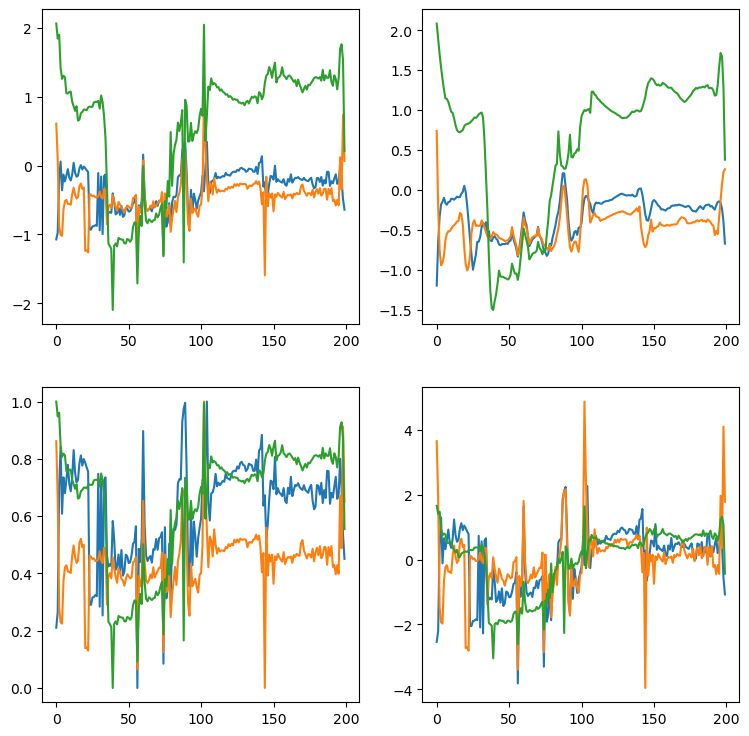

In [27]:
px = TS[k1][0]
py = TS[k1][2]

pz = TS[k2][0]

from scipy.signal import savgol_filter
fig, axs = plt.subplots(2,2, figsize=(9,9))

for ts in [px,py,pz]:
    p_smooth = savgol_filter(ts, window_length=9, polyorder=3)
    axs[0][0].plot(Bs, ts, "-")
    axs[0][1].plot(Bs, p_smooth)
    axs[1][0].plot(Bs, normalize(ts), "-")
    axs[1][1].plot(Bs, (ts-np.average(ts))/np.std(ts), "-")
plt.show()


[0.61515351 0.13997795 0.02722906 0.02090372]


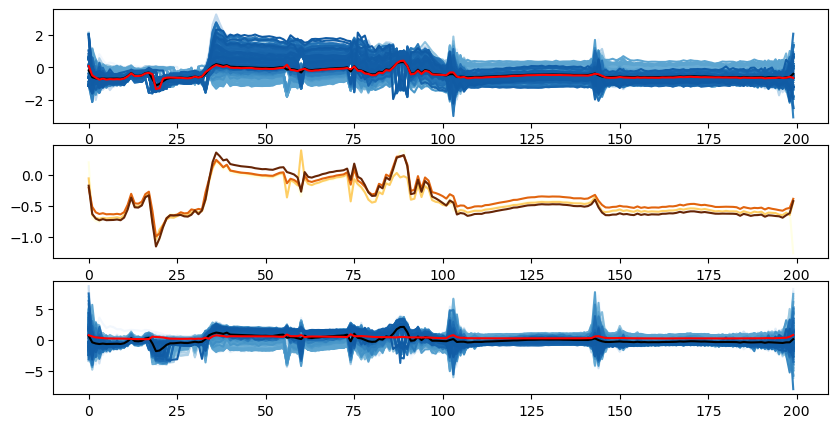

[0.6043821  0.12432668 0.04653499 0.04123699]


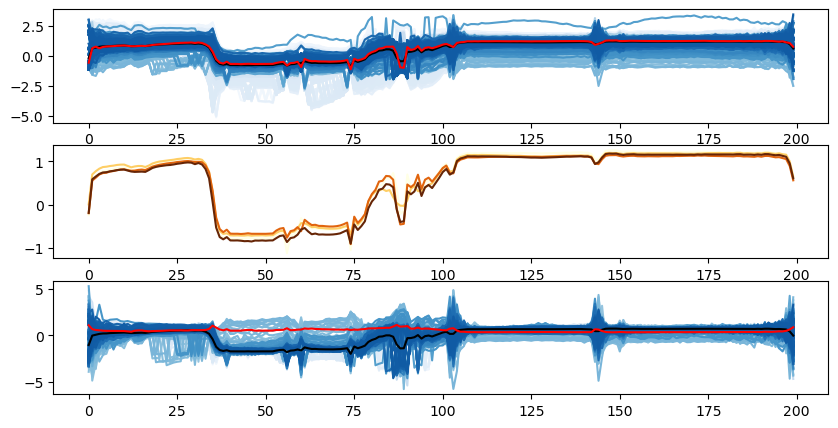

[0.55062397 0.26655857 0.03119493 0.01724498]


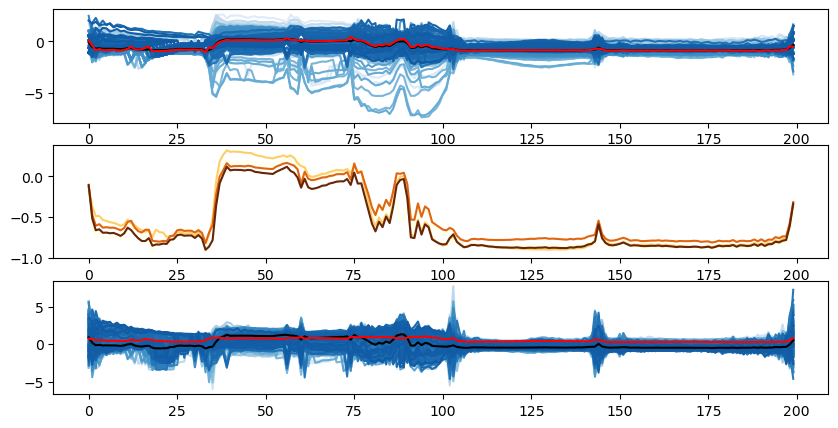

In [28]:
from sklearn.metrics.pairwise import cosine_similarity
from scipy.spatial.distance import cdist


for i, k in enumerate([k1,k2,k3]):
    info:SPInfo = SPs_info[k]

    fig, axs = plt.subplots(3, figsize=(10,5))
    TS_colors = mpl.colormaps["Blues"](np.linspace(0, 1, int(1.2*len(info.time_series))))
    for c,arr in enumerate(info.time_series):
        axs[0].plot(Bs, arr, "-", color=TS_colors[c])

    #medoid = compute_medoid(TS[k])
    #axs[0].plot(Bs, medoid, "-", color="orange", label="medoid")
    axs[0].plot(Bs, info.mean, "-", color="black", label="average")
    pointWiseMedian = np.median(info.time_series, axis=0)
    axs[0].plot(Bs, pointWiseMedian, "-", color="red", label="point-wise Median")
    #similarites = cosine_similarity(TS[k])
    #print(np.mean(similarites[np.triu_indices_from(similarites, k=1)]))


    print(info.pca.explained_variance_ratio_)
    comp_colors = mpl.colormaps["YlOrBr"](np.linspace(0, 1, n_component))
    for c in range(n_component):
        axs[1].plot(Bs, info.components[n_component-1-c], "-", color=comp_colors[c])

    for c,arr in enumerate(TS_Z[k]):
        axs[2].plot(Bs, arr, "-", color=TS_colors[c])
    axs[2].plot(Bs, np.average(TS_Z[k], axis=0), "-", color="black", label="average")
    #medoid_Z = compute_medoid(TS_Z[k])
    #axs[2].plot(Bs, medoid_Z, "-", color="orange", label="medoid")
    axs[2].plot(Bs, info.std, "-", color="red", label="standard deviation")
    
    plt.show()


def sim_comp_perason(comp1, comp2):
    n,_ = comp1.shape
    distances = np.zeros((n,n))
    for i in range(n):
        for j in range(n):
            distances[i,j] = PerasonCorrelation(comp1[i], comp2[j])
    return np.average(distances)


from sklearn.cross_decomposition import CCA
def sim_comp_cca(comp1, comp2):
    X = comp1.copy().T
    Y = comp2.copy().T
    cca = CCA(n_components=comp1.shape[0])
    cca.fit(X,Y)
    c1, c2 = cca.transform(X,Y)
    correlations = [np.corrcoef(c1[:,i], c2[:,i])[0,1] for i in range(comp1.shape[0])]
    return 1-np.mean(correlations)/2

### Merge SPs

In [6]:
def SP_average(data, SP):
    N,M,B = data.shape
    res = np.zeros(B)
    for x,y in SP:
        res += data[x,y,:]
    return res/len(SP)


def squaredDist(a, b):
    return (a[0]-b[0])**2 + (a[1]-b[1])**2

def SP_weighted_average(data, SP):
    c = np.average(SP, axis=0)
    dists = np.array([np.exp(-0.5*squaredDist(a, c)**0.5) for a in SP])
    if dists.max()-dists.min()!=0:
        dists = (dists-dists.min())/(dists.max()-dists.min())
    else:
        dists = [1/len(dists) for _ in range(len(SP))]

    N,M,B = data.shape
    res = np.zeros(B)
    for i,(x,y) in enumerate(SP):
        res += dists[i] * data[x,y,:]
    return res/len(SP)


def norm1(x,y):
    return np.abs(x-y).sum()/len(x)

def norm2(x,y):
    return ((x-y)**2).sum()/len(x)


def merge_SPs_basic(data, SPs, L, simFun=norm1):
    nb_SPs = len(SPs)
    existing = [True for _ in range(nb_SPs)]
    SPs_liste = [[SP, SP_average(data, SP)] for SP in SPs]
    weights = [{j:simFun(SPs_liste[i][1], SPs_liste[j][1]) for j in range(i+1, nb_SPs)} for i in range(nb_SPs)]

    while nb_SPs>L:
        minimun = None
        argmin = None
        for k1 in range(len(SPs)):
            if existing[k1]:
                for k2 in weights[k1].keys():
                    if existing[k2]:
                        if minimun==None or weights[k1][k2]<minimun:
                            argmin = (k1, k2)
                            minimun = weights[k1][k2]
        k1,k2 = argmin
        SP_union = SPs_liste[k1][0] + SPs_liste[k2][0]
        SPs_liste[k1] = [SP_union, SP_average(data, SP_union)] #Opti to compute average easy without dividing by len(SP)
        existing[k2] = False

        for k in range(k1+1, len(SPs)):
            if existing[k]:
                weights[k1][k] = simFun(SPs_liste[k1][1], SPs_liste[k][1])
        for k in range(k1):
            if existing[k]:
                weights[k][k1] = simFun(SPs_liste[k1][1], SPs_liste[k][1])
        nb_SPs -= 1
    
    return [SPs_liste[i][0] for i in range(len(SPs)) if existing[i]]
       


def merge_SPs_v2(data, SPs, L, simFun=norm1):
    nb_SPs = len(SPs)
    existing = [True for _ in range(nb_SPs)]
    SPs_liste = [[SP, SP_weighted_average(data, SP)*len(SP)] for SP in SPs]
    weights = [{j:simFun(SPs_liste[i][1]/len(SPs_liste[i][0]),
                         SPs_liste[j][1]/len(SPs_liste[j][0]))
                    for j in range(i+1, nb_SPs)} for i in range(nb_SPs)]

    while nb_SPs>L:
        minimun = None
        argmin = None
        for k1 in range(len(SPs)):
            if existing[k1]:
                for k2 in weights[k1].keys():
                    if existing[k2]:
                        if minimun==None or weights[k1][k2]<minimun:
                            argmin = (k1, k2)
                            minimun = weights[k1][k2]
        k1,k2 = argmin
        SP_union = SPs_liste[k1][0] + SPs_liste[k2][0]
        SPs_liste[k1] = [SP_union, SPs_liste[k1][1] + SPs_liste[k2][1]]
        existing[k2] = False

        for k in range(k1+1, len(SPs)):
            if existing[k]:
                weights[k1][k] = simFun(SPs_liste[k1][1]/len(SPs_liste[k1][0]),
                                        SPs_liste[k][1]/len(SPs_liste[k][0]))
        for k in range(k1):
            if existing[k]:
                weights[k][k1] = simFun(SPs_liste[k1][1]/len(SPs_liste[k1][0]),
                                        SPs_liste[k][1]/len(SPs_liste[k1][0]))
        nb_SPs -= 1
    
    return [SPs_liste[i][0] for i in range(len(SPs)) if existing[i]]



def merge_SPs_v3(data, SPs, L, simFun=norm1):
    nb_SPs = len(SPs)
    existing = [True for _ in range(nb_SPs)]
    SPs_liste = [[SP, SP_average(data, SP), len(SP)] for SP in SPs]
    weights = [{j:simFun(SPs_liste[i][1], SPs_liste[j][1]) for j in range(i+1, nb_SPs)} for i in range(nb_SPs)]

    while nb_SPs>L:
        minimun = None
        argmin = None
        for k1 in range(len(SPs)):
            if existing[k1]:
                for k2 in weights[k1].keys():
                    if existing[k2]:
                        if minimun==None or weights[k1][k2]<minimun:
                            argmin = (k1, k2)
                            minimun = weights[k1][k2]
        k1,k2 = argmin
        SP_union = SPs_liste[k1][0] + SPs_liste[k2][0]
        selected = k1 if SPs_liste[k1][2] > SPs_liste[k2][2] else k2
        SPs_liste[k1] = [SP_union, SPs_liste[selected][1], len(SP_union)]
        existing[k2] = False

        for k in range(k1+1, len(SPs)):
            if existing[k]:
                weights[k1][k] = simFun(SPs_liste[k1][1], SPs_liste[k][1])
        for k in range(k1):
            if existing[k]:
                weights[k][k1] = simFun(SPs_liste[k1][1], SPs_liste[k][1]) #Opti to compute average easy without dividing by len(SP)
        nb_SPs -= 1
    
    return [SPs_liste[i][0] for i in range(len(SPs)) if existing[i]]
       



        
from sklearn.cluster import KMeans
def merge_SPs_kmeans(data, SPs, L):
    nb_cluster = L
    kmeans = KMeans(n_clusters=nb_cluster, n_init="auto")
    features = [SP_average(data, SP) for SP in SPs]
    kmeans.fit(features)

    SPs_merged = [[] for _ in range(nb_cluster)]
    for i in range(len(kmeans.labels_)):
        SPs_merged[kmeans.labels_[i]] += SPs[i]
    return SPs_merged



from sklearn.cluster import AgglomerativeClustering
def merge_Sps_agglomerative(data, SPs, L):
    features = [SP_average(data, SP) for SP in SPs]
    clustering = AgglomerativeClustering(n_clusters=L, linkage='ward')
    labels = clustering.fit_predict(features)

    SPs_merged = [[] for _ in range(L)]
    for i in range(len(labels)):
        SPs_merged[labels[i]] += SPs[i]
    return SPs_merged


from sklearn.cluster import SpectralClustering
def merge_Sps_spectral(data, SPs, L):
    features = [SP_average(data, SP) for SP in SPs]
    clustering = SpectralClustering(n_clusters=L, affinity='nearest_neighbors', assign_labels='kmeans')
    labels = clustering.fit_predict(features)

    SPs_merged = [[] for _ in range(L)]
    for i in range(len(labels)):
        SPs_merged[labels[i]] += SPs[i]
    return SPs_merged



def globalSPsMerge(data, SPs, L,
                   dist = ERS.norm1_similarity):
    nb_SPs = len(SPs)
    existing = [True for _ in range(nb_SPs)]
    SPs_liste = [[SP, SP_average(SP)] for SP in SPs]

    def simFun(x,y):
        return SPS.anovaFtest([x,y], dist=dist, averages=[x[1],y[1]])

    weights = [{j:simFun(SPs_liste[i], SPs_liste[j]) for j in range(i+1, nb_SPs)} for i in range(nb_SPs)]

    while nb_SPs>L:
        minimun = None
        argmin = None
        for k1 in range(len(SPs)):
            if existing[k1]:
                for k2 in weights[k1].keys():
                    if existing[k2]:
                        if minimun==None or weights[k1][k2]<minimun:
                            argmin = (k1, k2)
                            minimun = weights[k1][k2]
        k1,k2 = argmin
        SP_union = SPs_liste[k1] + SPs_liste[k2]
        SPs_liste[k1] = [SP_union, SP_average(data, SP_union)] #Opti to compute average easy without dividing by len(SP)
        existing[k2] = False

        for k in range(k1+1, len(SPs)):
            if existing[k]:
                weights[k1][k] = simFun(SPs_liste[k1], SPs_liste[k])
        for k in range(k1):
            if existing[k]:
                weights[k][k1] = simFun(SPs_liste[k1], SPs_liste[k])
        nb_SPs -= 1
    
    return [SPs_liste[i][0] for i in range(len(SPs)) if existing[i]]


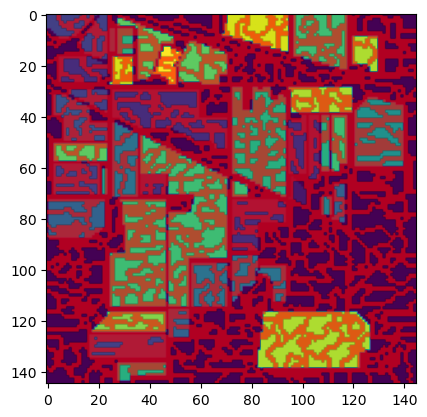

number of labels: 17
number of clusters: 17
<function merge_SPs_basic at 0x71af8fccaa20>
<function merge_SPs_v2 at 0x71af8fcc9b20>
<function merge_SPs_v3 at 0x71af8fccb1a0>
<function merge_SPs_kmeans at 0x71af8fccaf20>
<function merge_Sps_agglomerative at 0x71af8fcca840>
<function merge_Sps_spectral at 0x71af8fe97ec0>
<function globalSPsMerge at 0x71af94fb27a0>
<function merge_SPs_basic at 0x71af8fccaa20>
<function merge_SPs_v2 at 0x71af8fcc9b20>
<function merge_SPs_v3 at 0x71af8fccb1a0>
<function merge_SPs_kmeans at 0x71af8fccaf20>
<function merge_Sps_agglomerative at 0x71af8fcca840>
<function merge_Sps_spectral at 0x71af8fe97ec0>
<function globalSPsMerge at 0x71af94fb27a0>


In [9]:
K = 400
SPsUsedForMerges = {b:[SP.pixels for SP in Classifiers[b][K].SPs] for b in Classifiers.keys()}

plt.imshow(usedDataset["gt"])
plt.imshow(ERS.create_overlay_borders(usedDataset["gt"], SPsUsedForMerges[True]))
plt.show()

L = 17
print("number of labels:", len(usedDataset["labels"]))
print("number of clusters:", L)

funList = [
    merge_SPs_basic,
    merge_SPs_v2,
    merge_SPs_v3,
    merge_SPs_kmeans,
    merge_Sps_agglomerative,
    merge_Sps_spectral,
    SPS.globalSPsMerge
]
mergedSPsDic = {key:[SPs] for key,SPs in SPsUsedForMerges.items()}
for key,SPs_or in SPsUsedForMerges.items():
    for fun in funList:
        SPs = [[coor for coor in SP] for SP in SPs_or]
        print(fun)
        mergedSPsDic[key].append(fun(trainData, SPs, L))

merged_SPs_names = ["without", "v1", "v2", "v3", "kmeans", "agglomerative", "SpectralClustering",
                    "proposed"]

400
[49, 69, 57, 82, 41, 36, 61, 29, 55, 64, 30, 59, 78, 35, 102, 73, 26, 81, 62, 72, 27, 23, 77, 29, 17, 21, 47, 36, 56, 82, 63, 37, 48, 36, 30, 39, 40, 63, 18, 24, 33, 31, 62, 85, 38, 21, 39, 44, 68, 36, 30, 17, 34, 64, 47, 30, 122, 32, 30, 61, 46, 41, 71, 46, 95, 34, 40, 46, 40, 104, 42, 74, 22, 39, 30, 46, 22, 27, 36, 65, 41, 77, 55, 96, 64, 92, 31, 30, 27, 51, 34, 83, 43, 44, 122, 98, 113, 23, 22, 60, 56, 49, 25, 35, 31, 34, 25, 44, 46, 34, 32, 134, 44, 61, 25, 41, 31, 28, 35, 34, 71, 40, 106, 25, 32, 42, 22, 37, 35, 54, 19, 37, 30, 38, 83, 43, 46, 48, 41, 85, 59, 20, 93, 31, 45, 29, 32, 35, 26, 38, 32, 75, 67, 31, 48, 106, 26, 30, 95, 33, 24, 51, 38, 49, 57, 21, 63, 78, 53, 28, 33, 26, 31, 63, 108, 34, 47, 29, 39, 58, 28, 32, 75, 26, 49, 39, 29, 46, 39, 28, 40, 42, 43, 97, 72, 44, 30, 53, 65, 47, 78, 36, 63, 68, 28, 38, 45, 30, 33, 63, 25, 39, 131, 40, 65, 45, 34, 39, 45, 47, 64, 23, 74, 92, 21, 27, 86, 35, 33, 28, 29, 36, 48, 33, 41, 46, 70, 45, 36, 63, 94, 34, 104, 19, 135, 195

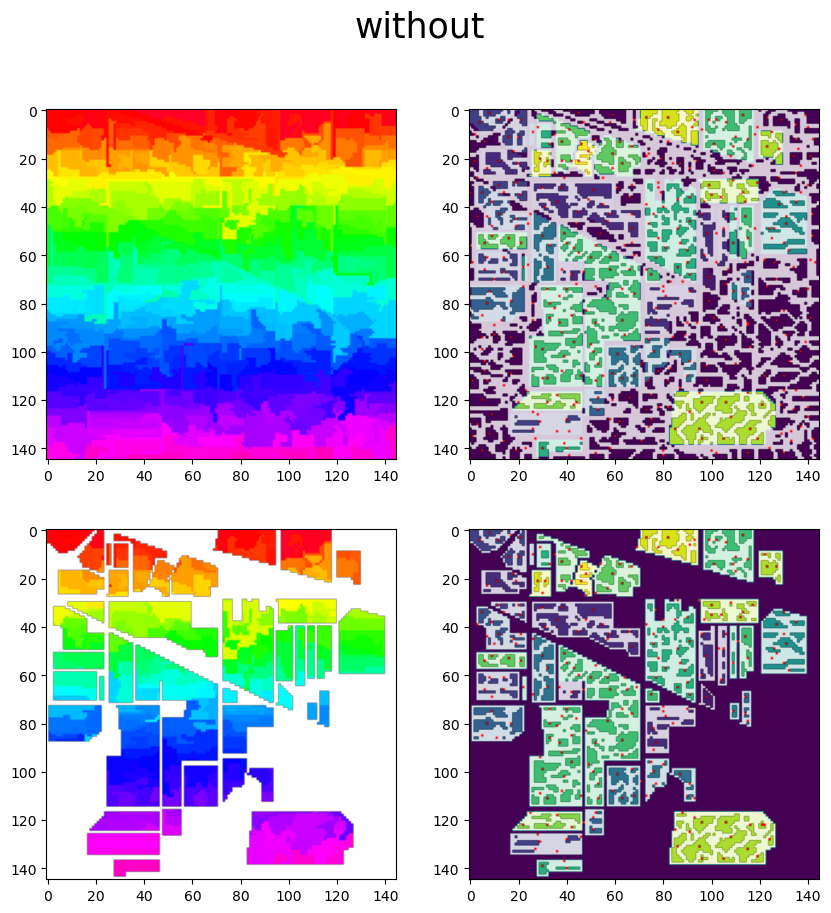

17
[439, 3742, 2921, 431, 246, 5468, 1542, 3591, 883, 36, 30, 765, 734, 30, 55, 34, 78]
17
[2171, 2850, 506, 884, 1064, 632, 157, 52, 27, 14, 224, 1, 935, 540, 34, 112, 46]


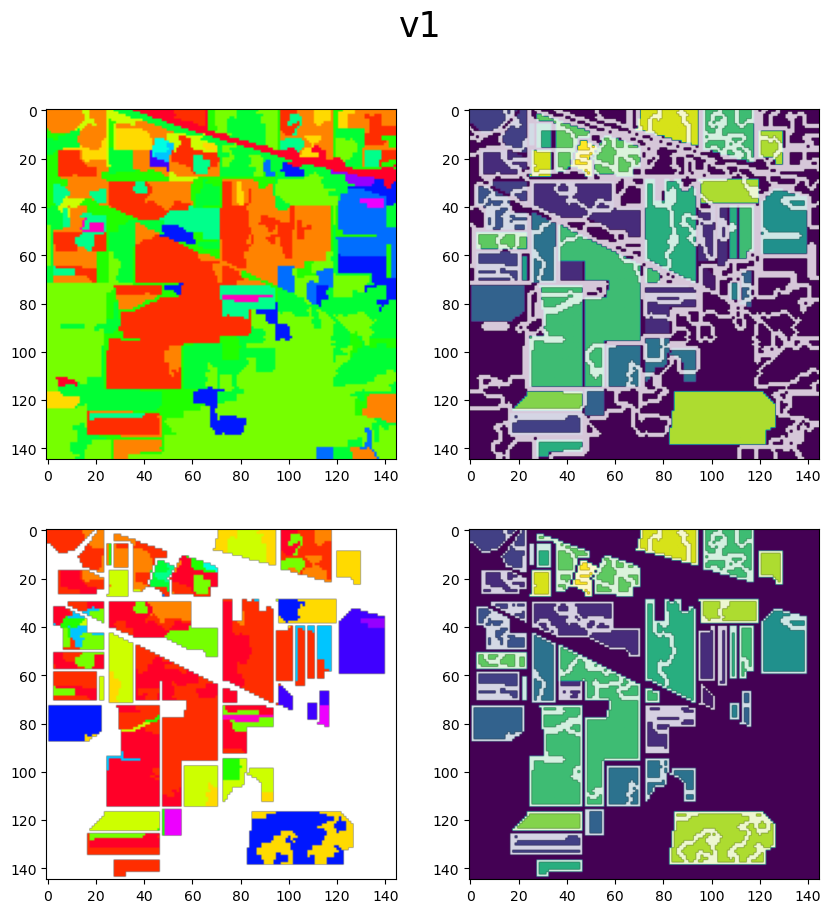

17
[3920, 5985, 9369, 410, 121, 30, 17, 30, 471, 46, 34, 32, 39, 74, 40, 386, 21]
17
[5644, 913, 2782, 570, 52, 14, 1, 1, 1, 29, 189, 23, 5, 8, 9, 7, 1]


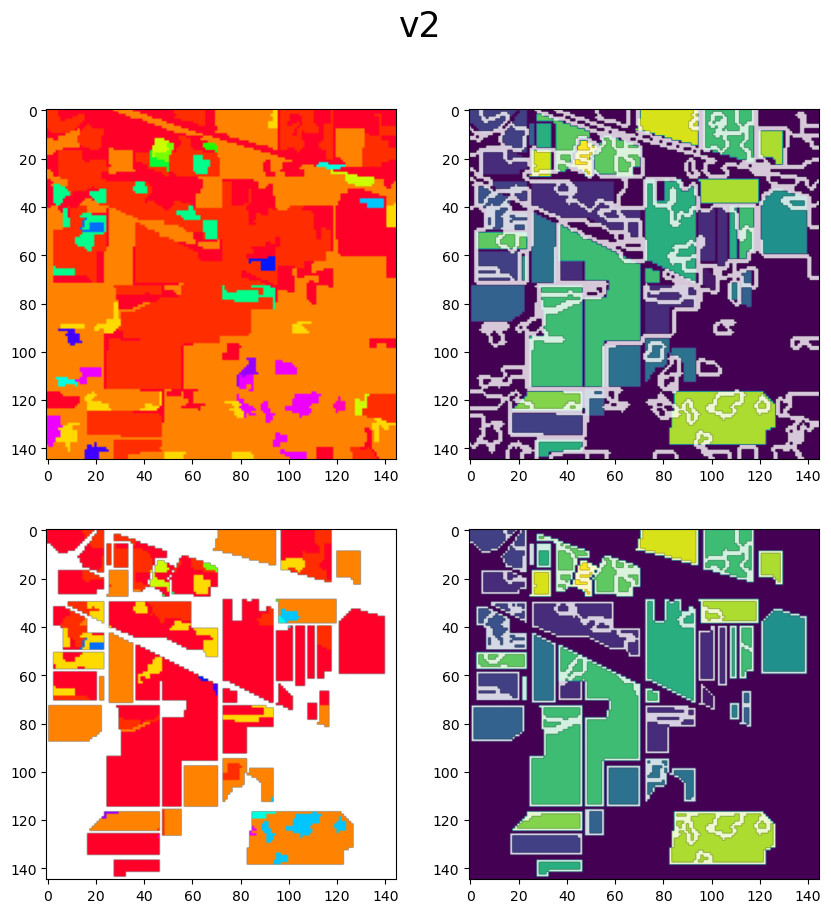

17
[620, 6530, 1150, 115, 5452, 1369, 3818, 286, 36, 30, 771, 30, 55, 594, 34, 108, 27]
17
[3820, 1301, 216, 192, 359, 1620, 551, 712, 145, 52, 27, 14, 472, 1, 574, 69, 124]


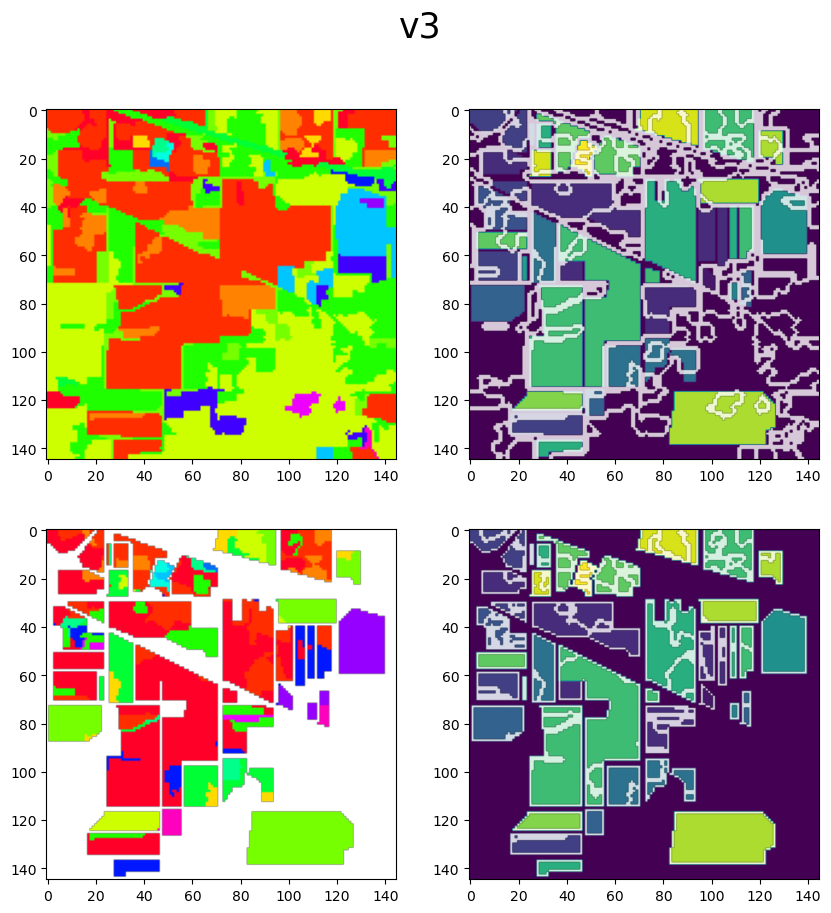

17
[1916, 1163, 1341, 2042, 1786, 837, 774, 1716, 548, 1594, 2149, 2390, 438, 531, 96, 1362, 342]
17
[1877, 154, 935, 479, 1757, 916, 171, 921, 613, 753, 275, 52, 403, 102, 259, 67, 515]


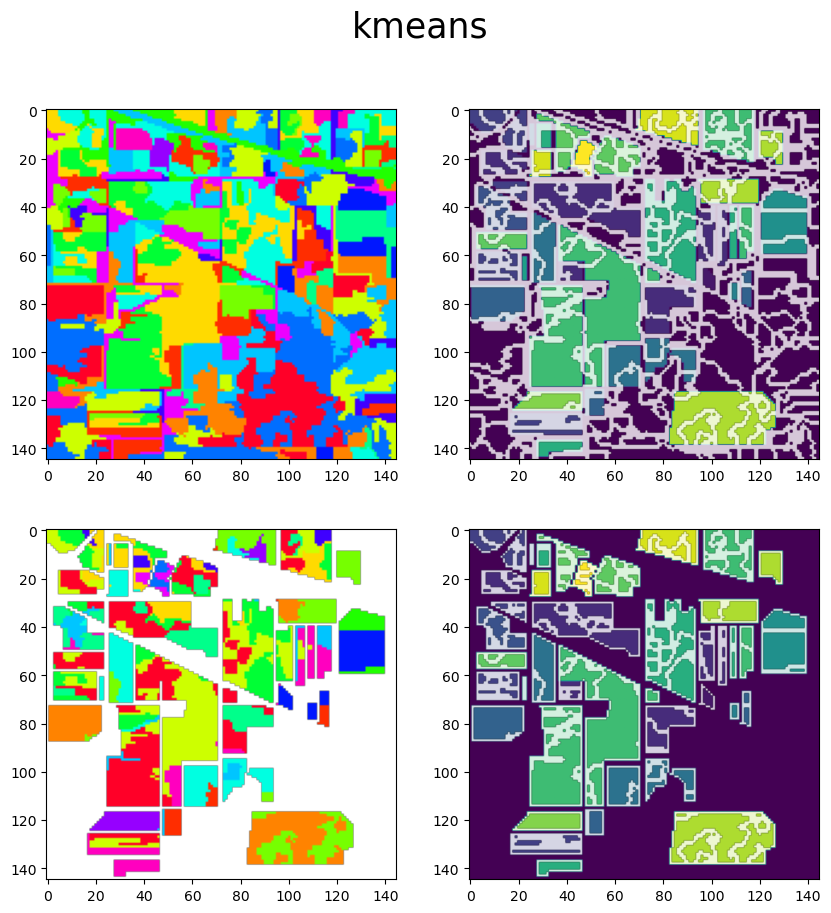

17
[1569, 2826, 3080, 2224, 1460, 2085, 1784, 431, 573, 667, 151, 438, 1347, 478, 656, 439, 817]
17
[574, 1498, 592, 80, 574, 259, 660, 1942, 384, 746, 963, 405, 204, 353, 112, 786, 117]


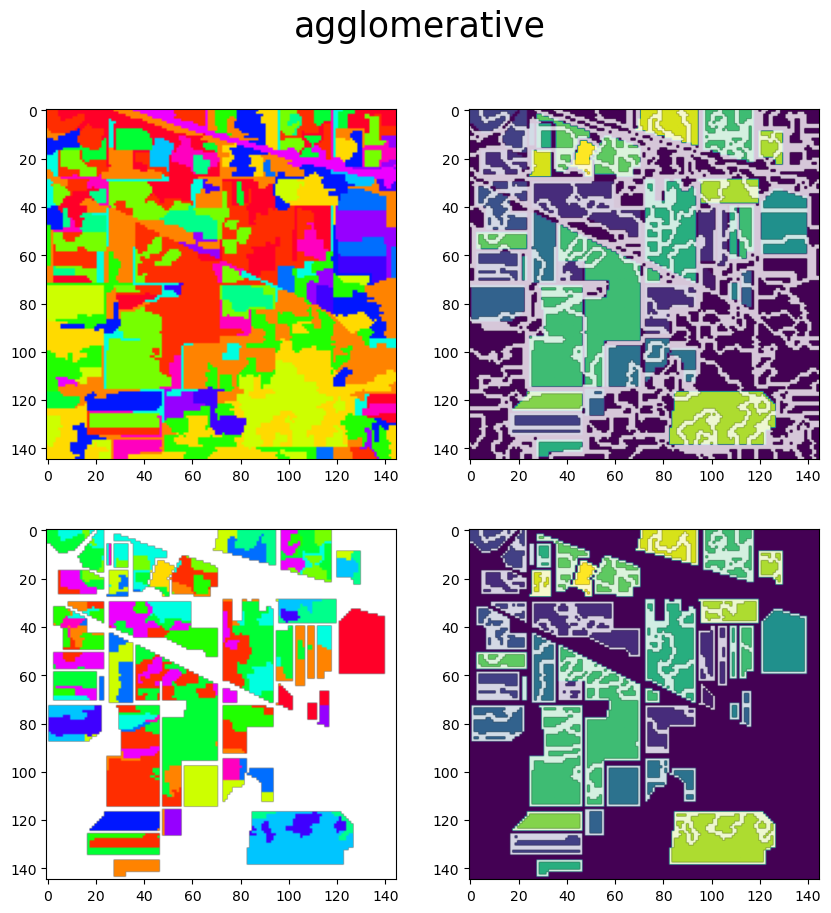

17
[1530, 1695, 988, 1484, 1066, 1873, 1201, 1759, 744, 1460, 728, 951, 1461, 881, 1486, 870, 848]
17
[1111, 371, 757, 937, 676, 515, 878, 278, 671, 311, 740, 640, 590, 307, 407, 486, 574]


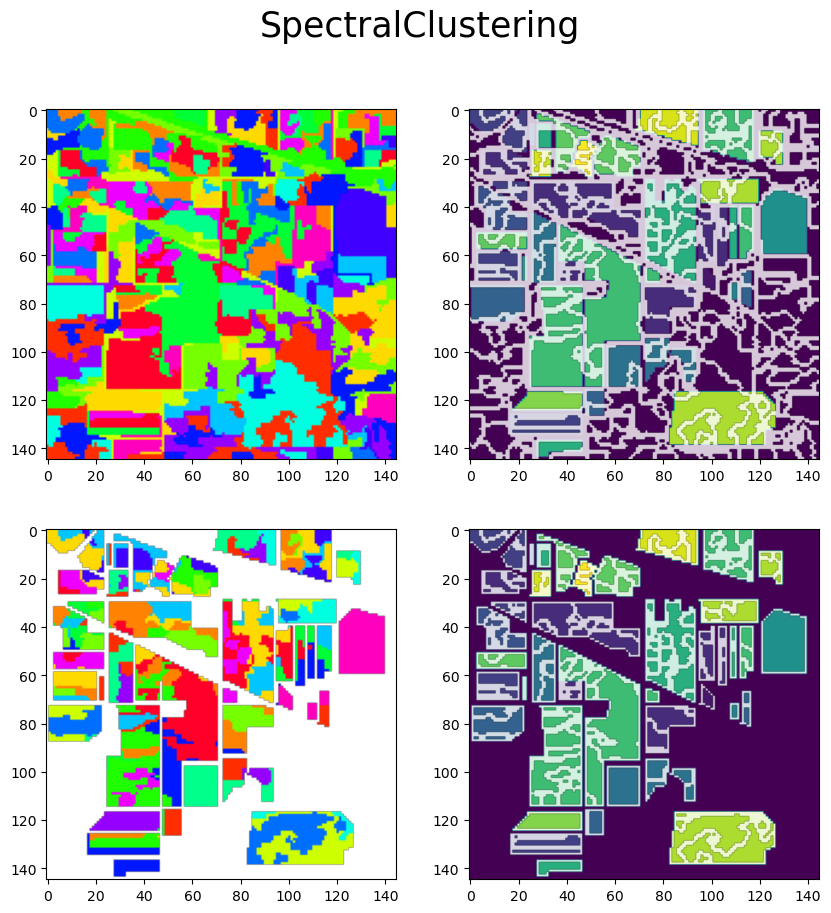

17
[1146, 2009, 1167, 701, 1156, 1525, 1832, 823, 1527, 1338, 1076, 942, 1754, 1278, 521, 1375, 855]
17
[1231, 74, 795, 273, 173, 1007, 685, 718, 321, 279, 1304, 533, 640, 574, 708, 639, 295]


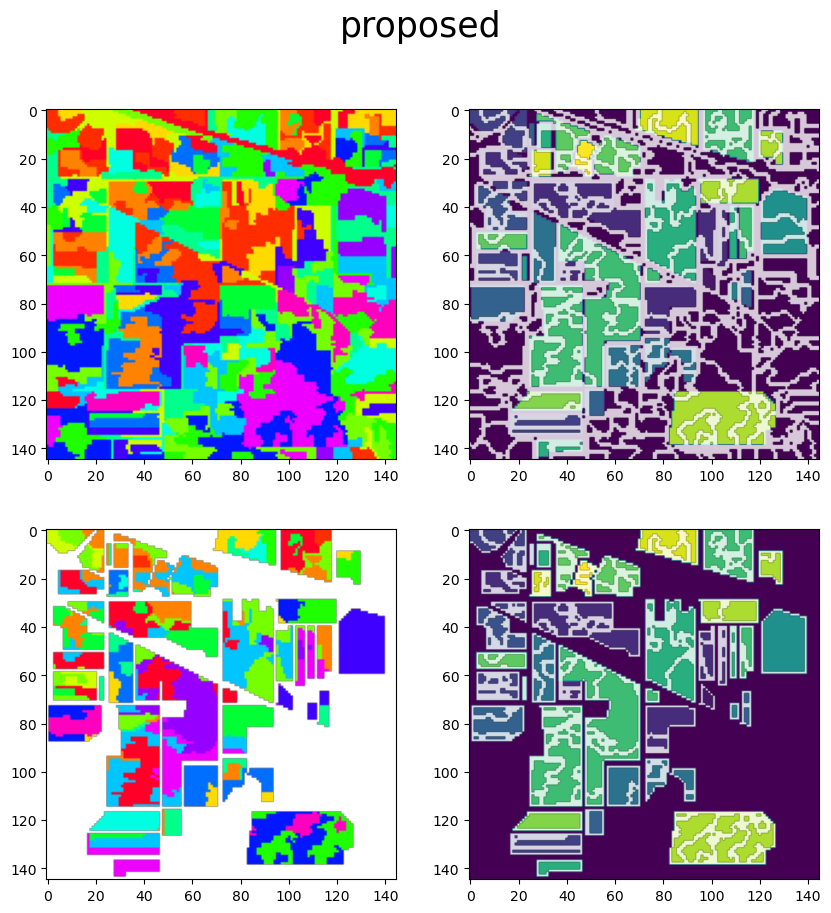

In [10]:
length = len(merged_SPs_names)
for i in range(length):

    fig, axs = plt.subplots(2, 2, figsize=(10,10))
    cmap = mpl.colormaps["gist_rainbow"]
    #np.random.shuffle(colors)
    n,m,_ = trainData.shape

    for k,key in enumerate(mergedSPsDic.keys()):
        SPs = mergedSPsDic[key][i]
        colors = cmap(np.linspace(0, 1, len(SPs)))
        print(len(SPs))
        print([len(SP) for SP in SPs])
        img = np.zeros((n,m,len(colors[0])))
        for j,SP in enumerate(SPs):
            for x,y in SP:
                img[x,y] = colors[j]

        axs[k][0].imshow(img)

        axs[k][1].imshow(usedDataset["gt"])
        mask = ERS.create_overlay_borders(usedDataset["gt"], SPs, color=[255,255,255,200])
        if merged_SPs_names[i]=="without":
            for SP in SPs:
                x,y = np.average(SP, axis=0)
                mask[int(x), int(y)] = [255,0,0,255]
        axs[k][1].imshow(mask)

    fig.suptitle(merged_SPs_names[i], fontsize=25)
    plt.show()

### SVM

In [10]:
import sklearn.utils
from sklearn.preprocessing import StandardScaler

def split_data(dataset, percent, bands):
    for_slices = [i for i in range(len(bands)) if bands[i]==1]
    X_train = []
    X_test = []
    y_train = []
    y_test = []
    nb_info = sum([len(liste) for key,(_,liste) in dataset["class"].items() if key!=0])
    weights = {}
    for key, (name, liste) in dataset["class"].items():
        if key !=0:
            indices = np.zeros(len(liste), dtype=int)
            indices[:int(len(liste)*percent)] = 1

            np.random.shuffle(indices)

            weights[key] = nb_info/ len(liste)
            
            for i in range(len(liste)):
                data = dataset["data"][liste[i]]
                if indices[i]==1:
                    X_train.append(data[for_slices])
                    y_train.append(key)
                else:
                    X_test.append(data[for_slices])
                    y_test.append(key)

    X_train, y_train = sklearn.utils.shuffle(X_train, y_train, random_state=42)
    X_test, y_test = sklearn.utils.shuffle(X_test, y_test, random_state=42)

    return np.array(X_train), np.array(y_train), np.array(X_test), np.array(y_test), weights
   
    


from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

import warnings
warnings.filterwarnings("ignore", category=UserWarning)


def SVM_accuracy(X_train,y_train, X_test,y_test):
    pipeline = Pipeline([
        ('scalar', StandardScaler()),
        ('svc', svm.SVC(kernel='rbf'))
    ])

    param_grid = {
        'svc__C': [0.1, 1, 10, 100, 1000, 2000, 4000],
        'svc__gamma': [1, 0.1, 0.01, 0.001, 0.0005, 0.0001]
    }

    clf = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    return len([0 for i in range(len(y_pred)) if y_pred[i]==y_test[i]]) /len(y_pred)


pourcents = {
    Data.IndianPines["name"]: 0.05,
    Data.PaviaUniversity["name"]: 0.02,
    Data.PaviaCenter["name"]: 0.01
}


### SSGA

In [29]:
class Param:
    GN = 100
    NP = 100
    Pc = 0.9
    Pm1 = 0.02
    Pm2 = 0.1
    b = 60

best_bands = []
best_fitness = []
best_accuracy = []

A = 200
chooseRandom = False
trainingData = usedDataset["data"]
Ssp_list = SSGA.compute_Sbsp_Stsp_list(trainData, SPs)
for i in range(A):
    if chooseRandom:
        bands = np.zeros(B, dtype=int)
        bands[:Param.b] = 1
        np.random.shuffle(bands)
        bands_fitness = SSGA.fitness_function(bands, Ssp_list[0], Ssp_list[1])
    else:
        pop, fitness = SSGA.SSGA(trainingData, Param.b, K, Param.GN, Param.NP, Param.Pc, Param.Pm1, Param.Pm2,
                                SP=SPs, S_list=Ssp_list)
        bands = pop[0]
        bands_fitness = fitness[0]
        
    best_fitness.append(bands_fitness)
    best_bands.append(bands)
    X_train,y_train, X_test,y_test, weights = split_data(usedDataset, pourcents[usedDataset["name"]], bands)
    best_accuracy.append(SVM_accuracy(X_train,y_train, X_test,y_test))


indices = [i for i in range(A)]
indices.sort(key=lambda i:best_fitness[i])
best_bands = [best_bands[i] for i in indices]
best_fitness = [best_fitness[i] for i in indices]
best_accuracy = [best_accuracy[i] for i in indices]

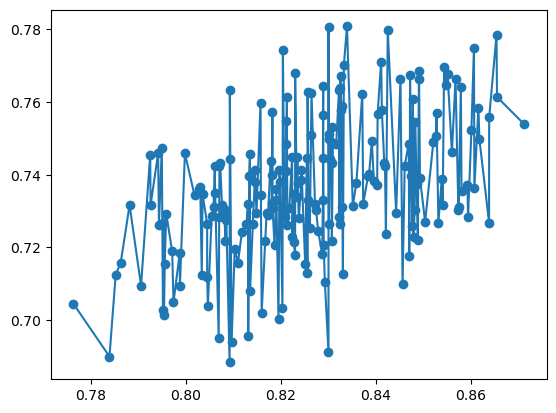

In [28]:
# Random
plt.plot(best_fitness, best_accuracy, "-o")
plt.show()

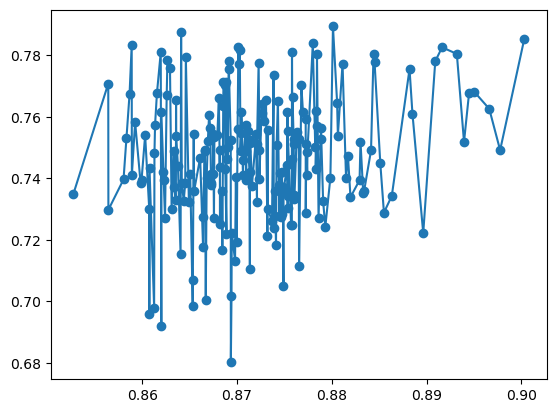

In [30]:
plt.plot(best_fitness, best_accuracy, "-o")
plt.show()

##### 9 bands

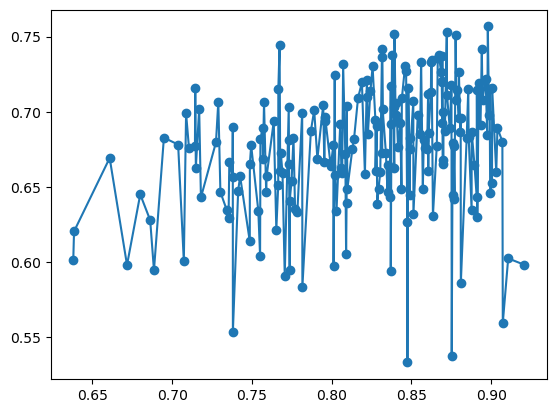

In [ ]:
# Random
plt.plot(best_fitness, best_accuracy, "-o")
plt.show()

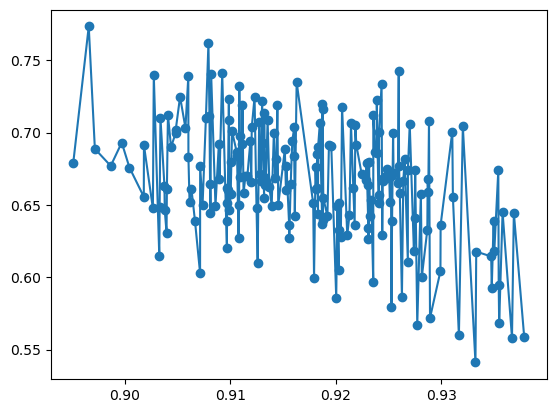

In [104]:
plt.plot(best_fitness, best_accuracy, "-o")
plt.show()

In [31]:
best = 0 
for i in range(A):
    if best_accuracy[i]>best_accuracy[best]:
        best=i
print(best)
print([i for i in range(B) if best_bands[best][i]==1])
print(best_fitness[best])
print(best_accuracy[best])

171
[7, 11, 14, 15, 17, 20, 21, 22, 24, 27, 33, 34, 35, 37, 46, 48, 58, 63, 65, 66, 70, 74, 77, 83, 98, 100, 104, 109, 111, 112, 119, 123, 125, 127, 129, 130, 131, 133, 134, 137, 138, 139, 146, 152, 156, 157, 159, 162, 164, 168, 171, 172, 173, 174, 175, 176, 177, 179, 184, 194]
0.880119143762179
0.7894088669950738


Good bands:
- Indian Pines:
    - 9: [10, 23, 40, 97, 124, 137, 147, 183, 185]
    - 60: [7, 11, 14, 15, 17, 20, 21, 22, 24, 27, 33, 34, 35, 37, 46, 48, 58, 63, 65, 66, 70, 74, 77, 83, 98, 100, 104, 109, 111, 112, 119, 123, 125, 127, 129, 130, 131, 133, 134, 137, 138, 139, 146, 152, 156, 157, 159, 162, 164, 168, 171, 172, 173, 174, 175, 176, 177, 179, 184, 194]


In [ ]:
bands = np.zeros(B, dtype=int)
bands[:Param.b] = 1
np.random.shuffle(bands)



X_train,y_train, X_test,y_test, weights = split_data(usedDataset, pourcents[usedDataset["name"]], bands)
print(SSGA.fitness_function(bands, Ssp_list[0], Ssp_list[1]))
print(SVM_accuracy(X_train,y_train, X_test,y_test))

0.8783873386713854
0.7214696223316913


In [48]:
print([i for i in range(len(bands)) if bands[i]==1])

[10, 15, 26, 27, 57, 128, 150, 186, 191]


good indiv:
- IndianPines:
    - [9, 27, 35, 39, 70, 122, 148, 172, 183]
    - [10, 23, 40, 97, 124, 137, 147, 183, 185]